# Data Exploration

This Jupyter notebook provides a step-by-step guide to explore the data for project. The purpose of this notebook is to analyze and gain insights into the available data. This notebook explores various data exploration techniques, visualization libraries, and statistical analysis methods to understand the data distribution, relationships, trends, anomalies and etc.

By going through this notebook, we will be able to:

- Load and examine the raw data files
- Perform descriptive statistics and summary analysis
- Visualize the data using charts, plots, and graphs
- Discover patterns and anomalies within the data
- Generate insights and make informed decisions for project

### Install Dependencies

To install the dependencies for this project, run the following command to install the dependencies specified in the `requirements.txt` file: `pip install -r requirements.txt`

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

This section involves retrieving the data from a sqlite database and loading it into two Pandas DataFrames. This step is essential for further analysis and exploration of the data.

In [38]:
conn = sqlite3.connect('data/seoul.sqlite')
bicycle_sharing_df = pd.read_sql_query(f"SELECT * FROM bike_data", conn)
weather_data_df = pd.read_sql_query(f"SELECT * FROM air", conn)
conn.close()

In [39]:
bicycle_sharing_df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Working Day
0,01/12/2017,254.0,0.0,-5.2,37,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204.0,1.0,-5.5,38,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173.0,2.0,-6.0,39,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107.0,3.0,-6.2,40,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78.0,4.0,-6.0,36,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [40]:
weather_data_df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


### Data Exploration

This section focuses on exploring two sets of data further: [Seoul bike sharing dataset](https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing/data) and [Seoul Weather Data](https://www.kaggle.com/datasets/bappekim/air-pollution-in-seoul).

#### Exploration of the Bicycle sharing Data in Seoul

In [41]:
bicycle_sharing_df.shape

(8760, 14)

In [42]:
bicycle_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   float64
 2   Hour                       8760 non-null   float64
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   float64
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Working Day                8760 non-null   objec

Now, let's examine the date range of the 'Bicycle sharing Data in Seoul' to determine the available data period, starting from the minimum date and ending at the maximum date.

In [43]:
date_df = pd.to_datetime(bicycle_sharing_df['Date'], format='%d/%m/%Y')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Bicycle sharing Data in Seoul: {min_date} to {max_date}"


'Date Range of the Bicycle sharing Data in Seoul: December-2017 to November-2018'

In [44]:
bicycle_sharing_df.head(6)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Working Day
0,01/12/2017,254.0,0.0,-5.2,37,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204.0,1.0,-5.5,38,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173.0,2.0,-6.0,39,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107.0,3.0,-6.2,40,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78.0,4.0,-6.0,36,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100.0,5.0,-6.4,37,1.5,2000.0,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [45]:
bicycle_sharing_df.tail(6)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Working Day
8754,30/11/2018,1384.0,18.0,4.7,34,1.9,1661.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003.0,19.0,4.2,34,2.6,1894.0,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764.0,20.0,3.4,37,2.3,2000.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694.0,21.0,2.6,39,0.3,1968.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712.0,22.0,2.1,41,1.0,1859.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584.0,23.0,1.9,43,1.3,1909.0,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


By examining the head and tail of the Bicycle sharing Data in Seoul, we can observe that initially not all counting stations recorded bicycle sharing counts. Hence, we can verify the number of counting stations based on the date.

In [46]:
counting_stations_df = pd.DataFrame({'Date': bicycle_sharing_df['Date']})
counting_stations_df['Counting Stations'] = (bicycle_sharing_df.iloc[:, 1:] != 0).sum(axis=1)
counting_stations_df

,Date,Counting Stations
0,01/12/2017,9
1,01/12/2017,10
2,01/12/2017,10
3,01/12/2017,10
4,01/12/2017,10
...,...,...
8755,30/11/2018,10
8756,30/11/2018,10
8757,30/11/2018,10
8758,30/11/2018,10


#### Exploration of the Weather and Climate Data of Seoul



In [47]:
weather_data_df.shape

(647511, 11)

In [48]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  float64
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(9), object(2)
memory usage: 54.3+ MB


In [49]:
date_df = pd.to_datetime(weather_data_df['Measurement date'], format='%Y-%m-%d %H:%M')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Weather Data: {min_date} to {max_date}"


'Date Range of the Weather Data: January-2017 to December-2019'

Keeping the records from December-2017 to November-2018

In [50]:
# Convert the 'Measurement date' column to datetime format
weather_data_df['Measurement date'] = pd.to_datetime(weather_data_df['Measurement date'], format='%Y-%m-%d %H:%M')

# Define the start and end dates for the desired range
start_date = pd.to_datetime('December-2017', format='%B-%Y')
end_date = pd.to_datetime('November-2018', format='%B-%Y')

# Create a boolean mask to filter the data
mask = (weather_data_df['Measurement date'] >= start_date) & (weather_data_df['Measurement date'] <= end_date)

# Apply the mask to filter the data
filtered_weather_data_df = weather_data_df[mask]

# Find the minimum and maximum dates in the filtered DataFrame
min_filtered_date = filtered_weather_data_df['Measurement date'].min()
max_filtered_date = filtered_weather_data_df['Measurement date'].max()

# Format the dates as needed
min_filtered_date_str = min_filtered_date.strftime('%B-%Y')
max_filtered_date_str = max_filtered_date.strftime('%B-%Y')

# Print the results
print(f"Minimum Date in Filtered Weather Data: {min_filtered_date_str}")
print(f"Maximum Date in Filtered Weather Data: {max_filtered_date_str}")


Minimum Date in Filtered Weather Data: December-2017
Maximum Date in Filtered Weather Data: November-2018


Now, examining the 'Climate Data of Seoul', it is apparent that the dataset contains a number of `null` values. Visualizing these `null` values allows us to assess their severity and identify columns that should be excluded from our reports.

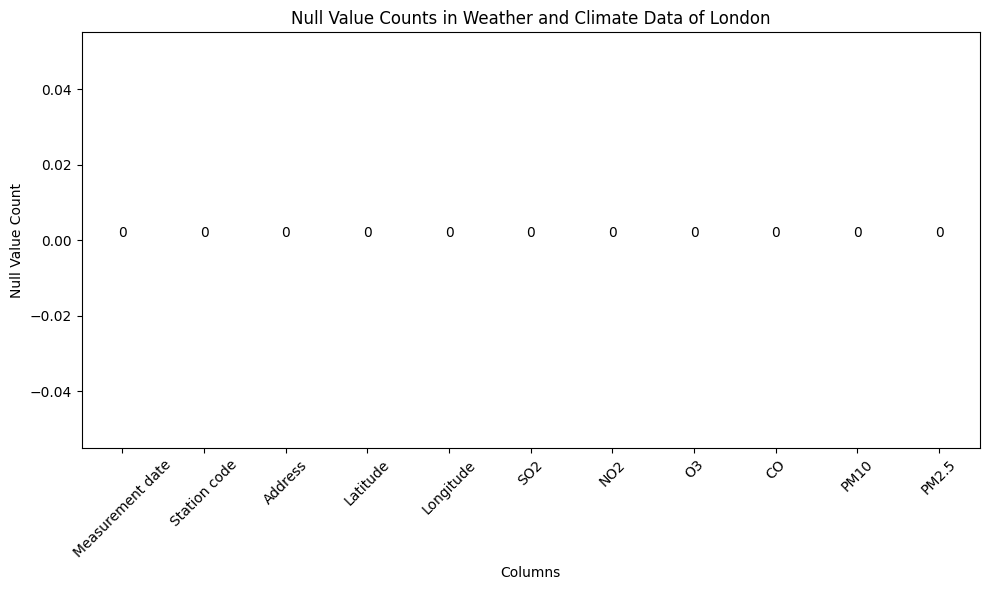

In [52]:
# Count the number of null values in each column
null_counts = filtered_weather_data_df.isnull().sum()

# Create a bar plot of null value counts
plt.figure(figsize=(10, 6))
ax = null_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts in Weather and Climate Data of London')
plt.xticks(rotation=45)

# Add text annotations for null count above each bar
for i, count in enumerate(null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()